# Biodiversity in National Parks in United States Analysis

In [1]:
# by: Winsten Coellins
# source of data: codecademy

In [2]:
# Questions of interest:
# 1. What are the species categories presented in the National Park?
# 2. What are the distribution of each categories in the National Park?
# 3. What are the type of the conservation status?
# 4. What are the distribution of each type of conservation status?
# 5. What animals are in a specific conservation status? Are they threatened, species of concern, endangered,
# or in recovery?
# 6. Are certain type of species more likely to be endangered?
# 7. What are each category's conservation status distribution?
# 8. How many National Parks are there? What are the name of the park?
# 9. Which species were spotted the most at each National Park?

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3

%matplotlib inline

In [4]:
observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

In [5]:
# Displaying observations data
print(len(observations))
observations.head()

23296


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [6]:
# Displaying species_info data
print(len(species))
species.head()

5824


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [7]:
# Establishing connection with Databases
conn1 = sqlite3.connect("observations.db")
observations.to_sql("observations", conn1, if_exists="replace", index=False)

conn2 = sqlite3.connect("species_info.db")
species.to_sql("species_info", conn2, if_exists="replace", index=False)

In [8]:
# Distinct category in species_info.csv
def find_distinct_category():
    category = []

    for c in species['category']:
        if(c not in category):
            category.append(c)

    return category

c = find_distinct_category()
print(c)

['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant']


In [9]:
# Getting the distribution of each category in a Data Frame using query
query = """
SELECT category AS `Category`, COUNT(category) AS `Counts`
FROM species_info
GROUP BY 1
ORDER BY 2 DESC
"""

df1 = pd.read_sql(query, conn2)
df1

,Category,Counts
0,Vascular Plant,4470
1,Bird,521
2,Nonvascular Plant,333
3,Mammal,214
4,Fish,127
5,Amphibian,80
6,Reptile,79


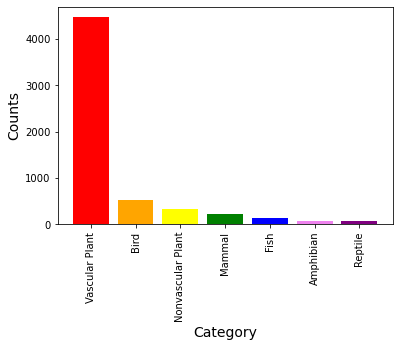

In [10]:
# Plotting category distribution to graph
x = df1['Category']
y = df1['Counts']

plt.bar(x, y, color=['red', 'orange', 'yellow', 'green', 'blue', 'violet', 'purple'])
plt.xticks(rotation=90)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show()

In [11]:
# Types of conservation_status
conserv_list = []

for danger in species['conservation_status']:
    if(danger not in conserv_list):
        conserv_list.append(danger)
        
print(conserv_list)

[nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']


In [12]:
# Distribution of conservation_status
query = """
SELECT conservation_status AS `Conservation Status`, COUNT(conservation_status) AS `Counts`
FROM species_info
GROUP BY 1
ORDER BY 2 DESC
"""

df2 = pd.read_sql(query, conn2).drop(4)
df2

,Conservation Status,Counts
0,Species of Concern,161
1,Endangered,16
2,Threatened,10
3,In Recovery,4


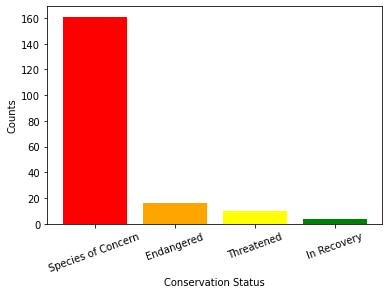

In [13]:
# Graph distribution of conservation_status
plt.bar(df2['Conservation Status'], df2['Counts'], color=['red', 'orange', 'yellow', 'green'])
plt.xticks(rotation=20)
plt.xlabel('Conservation Status')
plt.ylabel('Counts')
plt.show()

In [14]:
# Checking names of species with certain status
def species_status(status):
    species_stats = []

    for danger in range(len(species)):
        if(species['conservation_status'][danger] == status):
            species_stats.append(species['common_names'][danger])

    return species_stats

In [15]:
# Endangered species list
species_status('Endangered')

['Gray Wolf',
 'Red Wolf',
 'Gray Myotis',
 'Indiana Bat, Indiana Or Social Myotis',
 'Carolina Northern Flying Squirrel, Northern Flying Squirrel',
 'Whooping Crane',
 "Bachman's Warbler, Bachman's Wood Warbler",
 'Red-Cockaded Woodpecker',
 'Duskytail Darter',
 'Smoky Madtom',
 'Mountain Avens, Spreading Avens',
 'June Sucker',
 'Sierra Nevada Bighorn Sheep',
 'Gray Wolf, Wolf',
 'California Condor',
 'Sierra Nevada Yellow-Legged Frog']

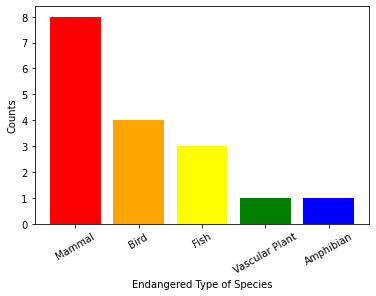

In [16]:
# Visualize which type of species are more likely to be endangered from the endangered list
endangered_list = species_status('Endangered')
species_type = []

for i in range(len(endangered_list)):
    for j in range(len(species)):
        if(endangered_list[i] == species['common_names'][j]):
            species_type.append(species['category'][j])

df_endangered = pd.DataFrame(species_type, columns=['type_of_species'])

# Establish a new db connection with endangered Data Frame
conn3 = sqlite3.connect('df_endangered.db')
df_endangered.to_sql('df_endangered', conn3, if_exists="replace", index=False)

# Querying
q = """
SELECT type_of_species AS `Type of Species`, COUNT(type_of_species) AS `Counts`
FROM df_endangered
GROUP BY 1
ORDER BY 2 DESC
"""

# Data Frame
new_df = pd.read_sql(q, conn3)

# Graph for visualization
plt.bar(new_df['Type of Species'], new_df['Counts'], color=['red', 'orange', 'yellow', 'green', 'blue'])
plt.xlabel('Endangered Type of Species')
plt.ylabel('Counts')
plt.xticks(rotation=30)
plt.show()

In [17]:
# Threatened species list
species_status('Threatened')

['Northern Long-Eared Bat, Northern Myotis',
 'Spotfin Chub',
 'Yellowfin Madtom',
 'Small Whorled Pogonia',
 'Virginia Spiraea',
 'Grizzly Bear',
 'Rainbow Trout',
 'Yosemite Toad',
 'California Red-Legged Frog',
 'Lahontan Cutthroat Trout']

In [18]:
# In Recovery species list
species_status('In Recovery')

['Bald Eagle', 'Gray Wolf, Wolf', 'American Peregrine Falcon', 'Brown Pelican']

In [19]:
# Species of Concern list
species_status('Species of Concern')

['Coyote',
 'Big Brown Bat',
 'Silver-Haired Bat',
 'Mississippi Myotis, Southeastern Myotis',
 "Keen's Myotis",
 'Eastern Small-Footed Bat, Eastern Small-Footed Myotis',
 'Little Brown Bat, Little Brown Myotis',
 "Cooper's Hawk",
 'Sharp-Shinned Hawk',
 'Golden Eagle',
 'Red-Shouldered Hawk',
 'Northern Harrier',
 'American Swallow-Tailed Kite, Swallow-Tailed Kite',
 'Turkey Vulture',
 'Osprey',
 'Lesser Scaup',
 'Black Tern',
 'Laughing Gull',
 'Black-Billed Cuckoo',
 'Merlin',
 'Peregrine Falcon',
 'Common Loon',
 'King Rail',
 'Blue Grosbeak',
 'Summer Tanager',
 'Brown Creeper',
 "Bachman's Sparrow",
 'Grasshopper Sparrow',
 "Lincoln's Sparrow",
 'Red Crossbill',
 'Purple Martin',
 'Bank Swallow',
 'Tree Swallow',
 'Loggerhead Shrike',
 'Yellow-Breasted Chat',
 'Nashville Warbler',
 "Wilson's Warbler",
 "Appalachian Bewick's Wren",
 'Olive-Sided Flycatcher',
 'Willow Flycatcher',
 'Great Blue Heron',
 'American Bittern',
 'Black-Crowned Night-Heron',
 'American White Pelican',
 'P

In [20]:
# Each category's conservation status distribution
query = """
SELECT conservation_status AS `Conservation Status`, category AS `Category`, COUNT(category) AS `Counts`
FROM species_info
WHERE conservation_status != 'None'
GROUP BY 2, 1
ORDER BY 2 DESC
"""

df3 = pd.read_sql(query, conn2)

# Pivoting the table
updated_df3 = df3.pivot(index='Conservation Status', columns='Category', values='Counts')
updated_df3

Category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
Conservation Status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Counts')

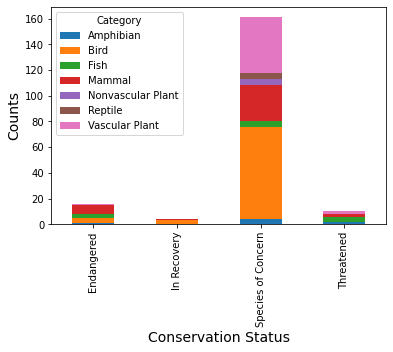

In [21]:
# Visualization of each category's conservation status
ax = updated_df3.plot(kind="bar", stacked=True)
ax.set_xlabel("Conservation Status", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)

In [22]:
def distinct_park():
    park = []
    
    for i in observations['park_name']:
        if(i not in park):
            park.append(i)
    
    return park

In [23]:
# Name of the park presented in the data
distinct_park()

['Great Smoky Mountains National Park',
 'Yosemite National Park',
 'Bryce National Park',
 'Yellowstone National Park']

In [24]:
# Species spotted the most at each national park
query = """
SELECT park_name as `Park Name`, scientific_name AS `Scientific Name`, MAX(observations) AS `Observations`
FROM observations
GROUP BY 1
"""

df4 = pd.read_sql(query, conn1)
df4

,Park Name,Scientific Name,Observations
0,Bryce National Park,Valerianella radiata,176
1,Great Smoky Mountains National Park,Sonchus asper ssp. asper,147
2,Yellowstone National Park,Lycopodium tristachyum,321
3,Yosemite National Park,Ivesia shockleyi var. shockleyi,223


In [25]:
# Common names of the most spotted species in the national park
names = list(df4['Scientific Name']) 
common_names = []
category = []

for i in names:
    for j in range(len(species)):
        if(i == species['scientific_name'][j]):
            common_names.append(species['common_names'][j])
            category.append(species['category'][j])

list(zip(common_names, category))

[('Beaked Corn-Salad, Corn Salad', 'Vascular Plant'),
 ('Spiny Sowthistle', 'Vascular Plant'),
 ('Deep-Root Clubmoss, Ground Cedar', 'Vascular Plant'),
 ("Shockley's Ivesia, Sky Mousetail", 'Vascular Plant')]

### Summary of the data

From the analysis and visualization, I could tell that there are seven type/categories of species presented in the data. Five of those being types of animals (Mammal, Bird, Reptile, Amphibian, and Fish) and two of those being types of plants (Vascular Plant and Nonvascular Plant). According to the data, the most type/category of species presented in the data is Vascular Plant, followed by Bird, Nonvascular Plant, Mammal, Fish, Amphibian, and Reptile. There are also four types of conservation status represented in the data (Species of Concern, Endangered, Threatened, and In Recover). As an addition, I have analyzed and listed the common names of animals and plants whom are in a specific conservation status (refer to kernel input 15, 17, 18, and 19). More importantly 'Mammal' type of species are more likely to be endangered in the current situation. As for the National Park presented in the data, there are a total of four National Park which are Great Smoky Mountains National Park, Yosemit National Park, Bryce National Park, and Yellow Stone National Park), and the most spotted species from each for of these National Parks are Vascular Plant as predicted since the most types/category of species presented in the data are from Vascular Plant category.